In [1]:
import SimpleITK as sitk
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import os
import numpy as np


ref_path = './Reference/Reference_old.png'
input_path = './Pngs'


In [2]:
# creates a new folder if it does not already exist
def new_dir(dirName):
    try:
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")

# fixed and moving are assumed as sitk.Image arrays
def affine_registration(fixed, moving):
    
    parameterMap = sitk.GetDefaultParameterMap('affine')
    elastixImageFilter = sitk.ElastixImageFilter()
    elastixImageFilter.SetFixedImage(fixedImage)
    elastixImageFilter.SetMovingImage(movingImage)
    elastixImageFilter.SetParameterMap(parameterMap)
    elastixImageFilter.Execute()
    resultImage = elastixImageFilter.GetResultImage()
    transformParameterMap = elastixImageFilter.GetTransformParameterMap()
    return resultImage, transformParameterMap
  
def IoU(img1, img2):
    intersection = numpy.logical_and(img1, img2)
    union = numpy.logical_or(img1, img2)
    iou_score = numpy.sum(intersection) / numpy.sum(union)
    return iou_score

Wall time: 1min 45s


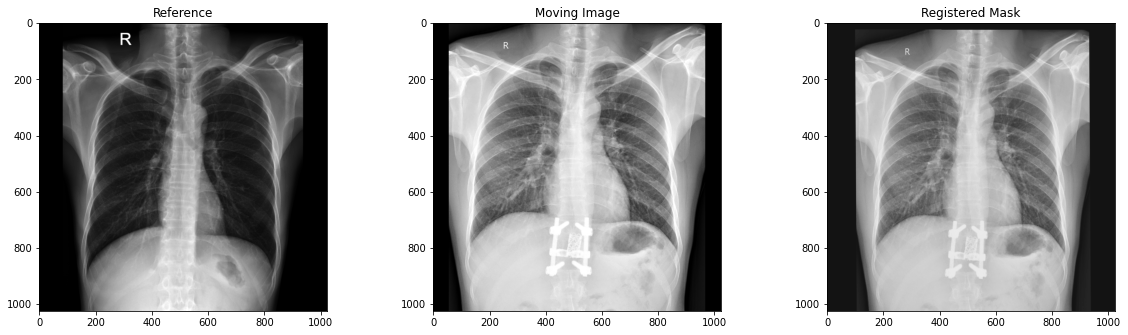

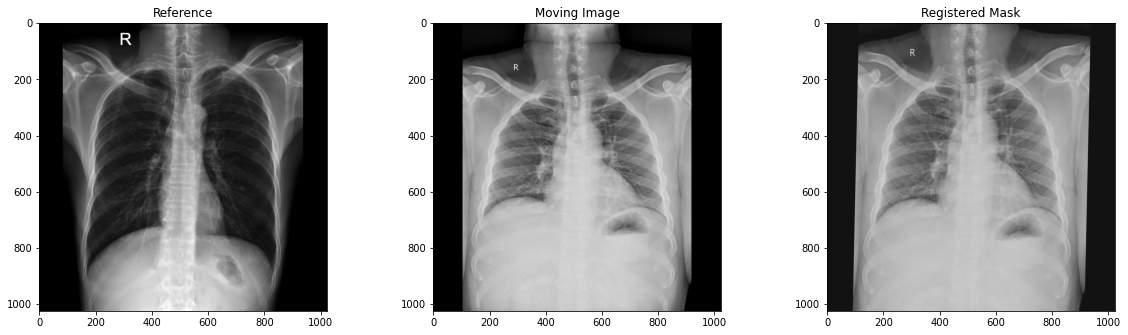

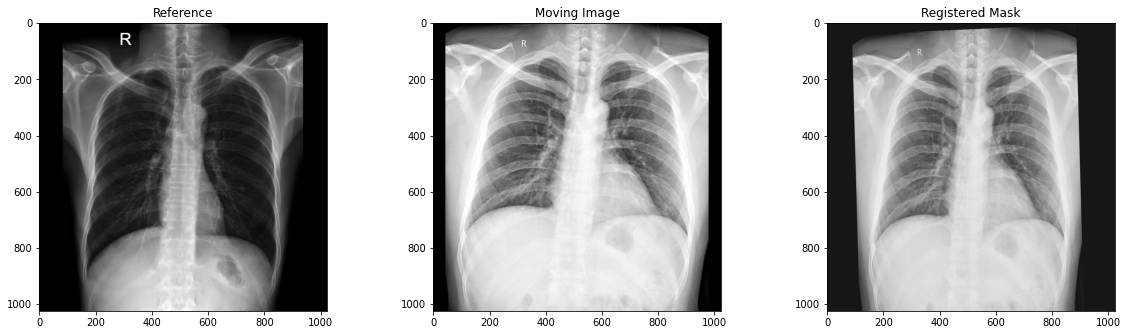

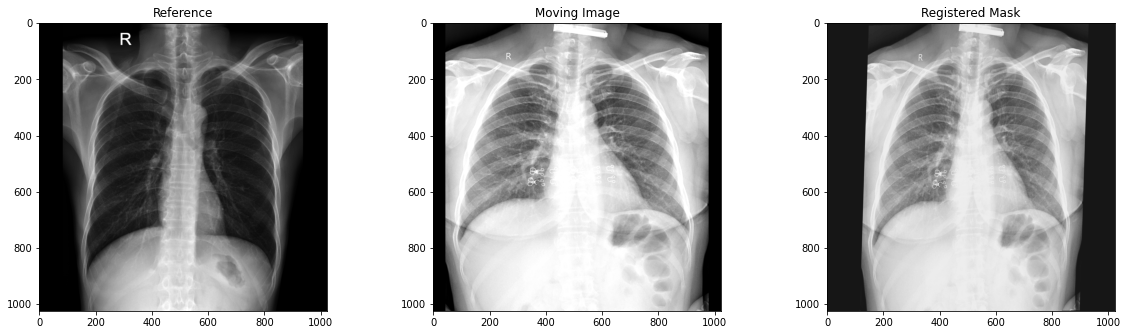

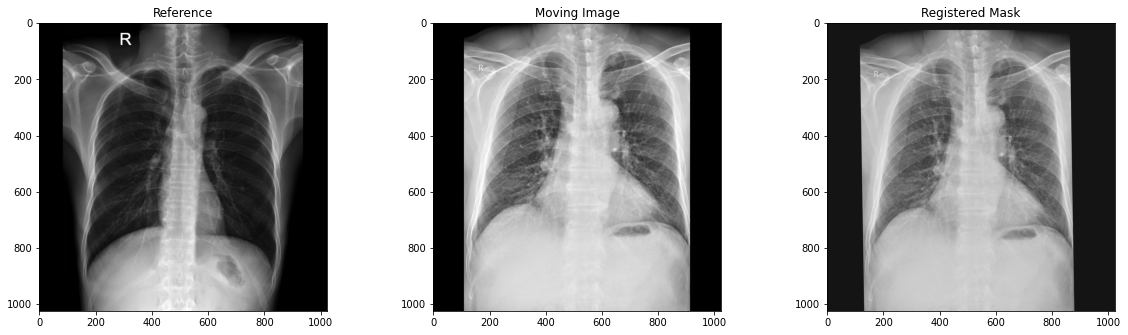

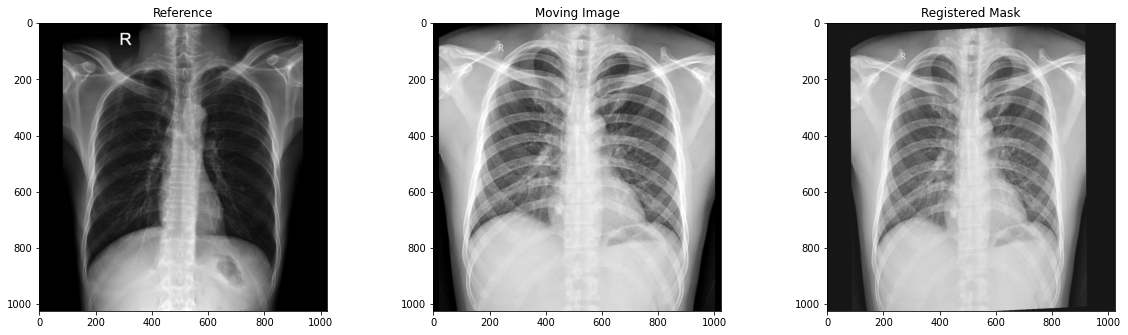

In [3]:
%%time
fixedImage = sitk.ReadImage(ref_path, sitk.sitkFloat32)
for filename in os.listdir(input_path):
    if filename.endswith(".png"):
        path = os.path.join(input_path, filename)
        movingImage = sitk.ReadImage(path,sitk.sitkFloat32)
        path2 = os.path.join('Registered_with_SimpleElastix', filename) 
        ri, tpm = affine_registration(fixedImage, movingImage)
        res = sitk.GetArrayFromImage(ri)
        reference = sitk.GetArrayFromImage(fixedImage)  
        to_register = sitk.GetArrayFromImage(movingImage)

        plt.figure(figsize=(20, 18))
        plt.subplot(3, 3, 1)
        plt.title('Reference')
        plt.imshow(reference, cmap='gray')
        plt.subplot(3, 3, 2)
        plt.title('Moving Image')
        plt.imshow(to_register, cmap='gray')
        plt.subplot(3, 3, 3)
        plt.title('Registered Image')
        plt.imshow(res, cmap='gray')
        result = Image.fromarray(res)
        result.convert('P').save(path2.replace('.png','_SimpleElastix.png'), 'PNG')

    else:
        continue

### Intersection / union to check if SimpleElastix is as accurate as PyElastix